In [1]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")
desktop = path.join(home, "Desktop")

from matplotlib import animation
import matplotlib.pyplot as plt

# define format for the plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

working_path = '../'

In [2]:
# define the contour levels
levels = linspace(0.13, 0.35, 50)

# define a custmized color map
colors1 = array([[1, 1, 1, 1]])
colors2 = plt.cm.jet(linspace(0., 1, 10))
colors = vstack((colors1, colors2))
my_cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

# change the following line to your results folder

In [3]:
# change the following line to your results folder
ResultFolder = "Run_TempDepVisc"

In [5]:
# load hydrodynamic evolution data
data = fromfile(
    path.join(working_path, ResultFolder,
              "evolution_for_movie_xyeta_MUSIC.dat"), dtype=float32)

# read header about the grid information
header = data[0:12]

# read in data and reshape it to the correct form
data = data[12:].reshape(-1, int(header[-1]))

# get the list for tau frame
tau_list = unique(data[:, 0])
ntau = len(tau_list)
tau0= header[0]; dtau = header[1];
tau_list = array([tau0 + i*dtau for i in range(ntau)])

# define 3D grid in x, y, and eta_s (space-time rapidity)
neta = int(header[8])
eta_size = -2.*header[10]
deta = header[9]
eta = array([-eta_size/2.+i*deta for i in range(neta)])

nx = int(header[2])
x_size = 2.*abs(header[4])
dx = header[3]
x = array([-x_size/2.+i*dx for i in range(nx)])

ny = int(header[5])
y_size = 2.*abs(header[7])
dy = header[6]
y = array([-y_size/2.+i*dy for i in range(ny)])

# create 3D grids for energy density, temperature, and velocity
ed = zeros([ntau, neta, nx, ny])
T  = zeros([ntau, neta, nx, ny])
vx = zeros([ntau, neta, nx, ny])
vy = zeros([ntau, neta, nx, ny])
for itau in range(ntau):
    idx = (abs(data[:, 0] - itau) < 0.1)
    data_cut = data[idx, :]
    for igrid in range(len(data_cut[:, 0])):
        x_idx   = int(data_cut[igrid, 1] + 0.1)
        y_idx   = int(data_cut[igrid, 2] + 0.1)
        eta_idx = int(data_cut[igrid, 3] + 0.1)
        u0 = sqrt(1. + data_cut[igrid, 9]**2.
                  + data_cut[igrid, 10]**2. + data_cut[igrid, 11]**2)
        ed[itau, eta_idx, x_idx, y_idx] = data_cut[igrid, 5]
        T[itau, eta_idx, x_idx, y_idx]  = data_cut[igrid, 7]
        vx[itau, eta_idx, x_idx, y_idx] = data_cut[igrid, 9]/u0
        vy[itau, eta_idx, x_idx, y_idx] = data_cut[igrid, 10]/u0

# print out some useful information about the evolution file
print("Read in data completed.")
print("ntau = {0}, tau_min = {1:.2f} fm, tau_max = {2:.2f} fm, dtau = {3:.3f} fm".format(
                            ntau, tau_list[0], tau_list[-1], dtau))
print("nx = {0}, x_min = {1:.2f} fm, x_max = {2:.2f} fm, dx = {3:.2f} fm".format(
                            nx, x[0], x[-1], dx))
print("ny = {0}, y_min = {1:.2f} fm, y_max = {2:.2f} fm, dy = {3:.2f} fm".format(
                            ny, y[0], y[-1], dy))
print("neta = {0}, eta_min = {1:.2f} fm, eta_max = {2:.2f} fm, deta = {3:.2f}".format(
                            neta, eta[0], eta[-1], deta))

Read in data completed.
ntau = 109, tau_min = 0.50 fm, tau_max = 11.30 fm, dtau = 0.100 fm
nx = 50, x_min = -15.00 fm, x_max = 14.40 fm, dx = 0.60 fm
ny = 50, y_min = -15.00 fm, y_max = 14.40 fm, dy = 0.60 fm
neta = 1, eta_min = 0.00 fm, eta_max = 0.00 fm, deta = 0.10


## make a 2D contour plot for initial temperature distribution in the transverse plane

<IPython.core.display.Javascript object>


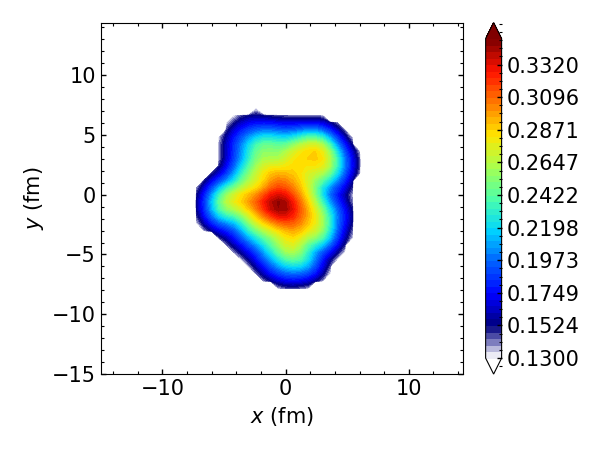

In [6]:
# make a 2D meshgrid in the transverse plane
X, Y = meshgrid(x, y)

# make the contour plot
fig = plt.figure()
cont = plt.contourf(X, Y, T[0, 0, :, :], levels, cmap=my_cmap, extend='both')
cbar = fig.colorbar(cont)
plt.xlabel(r"$x$ (fm)")
plt.ylabel(r"$y$ (fm)")
plt.tight_layout()

## A 2D contour plot for $\tau$ vs x.

<IPython.core.display.Javascript object>


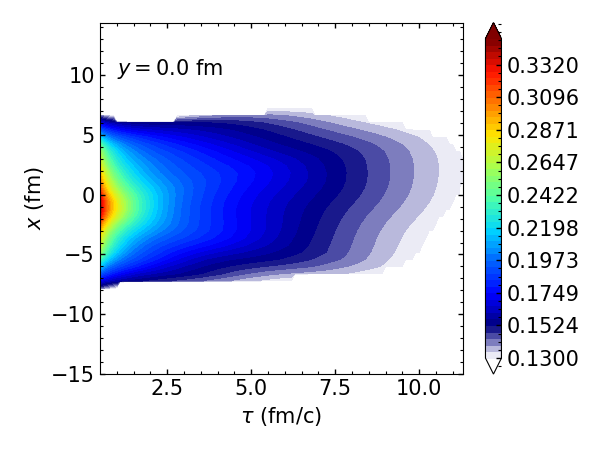

In [7]:
Tau, X = meshgrid(tau_list, x)

y_idx = int(ny/2)  # pick the central point in the y direction

fig = plt.figure()
cont = plt.contourf(Tau, X, T[:, 0, :, y_idx].transpose(), levels,
                    cmap=my_cmap, extend='both')
cbar = fig.colorbar(cont)
plt.xlabel(r"$\tau$ (fm/c)")
plt.ylabel(r"$x$ (fm)")
plt.text(1.0, 10.0, r'$y = {0:3.1f}$ fm'.format(y[y_idx]))
plt.tight_layout()

## Generate a movie for temperature profile

<IPython.core.display.Javascript object>


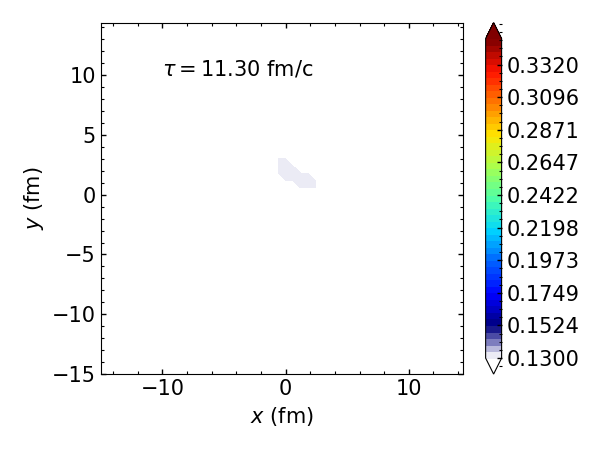

In [8]:
X, Y = meshgrid(x, y)

# first plot the first frame as a contour plot
fig = plt.figure()
cont = plt.contourf(X, Y, T[0, 0, :, :].transpose(), levels,
                    cmap=my_cmap, extend='both')
time_text = plt.text(-10, 10, r"$\tau = {0:4.2f}$ fm/c".format(tau_list[0]))
cbar = fig.colorbar(cont)
plt.xlabel(r"$x$ (fm)")
plt.ylabel(r"$y$ (fm)")
plt.tight_layout()

# define animation function to update the contour at every time frame
def animate(i): 
    global cont, time_text
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(X, Y, T[i, 0, :, :], levels, cmap=my_cmap, extend='both')
    time_text.set_text(r"$\tau = {0:4.2f}$ fm/c".format(tau_list[i]))
    return cont, time_text

# create the animation
anim = animation.FuncAnimation(fig, animate, frames=ntau, repeat=False)

# save the animation to a file
#anim.save('animation.mp4', fps=24)

## Generate movie for temperature evolution with velocity field

<IPython.core.display.Javascript object>


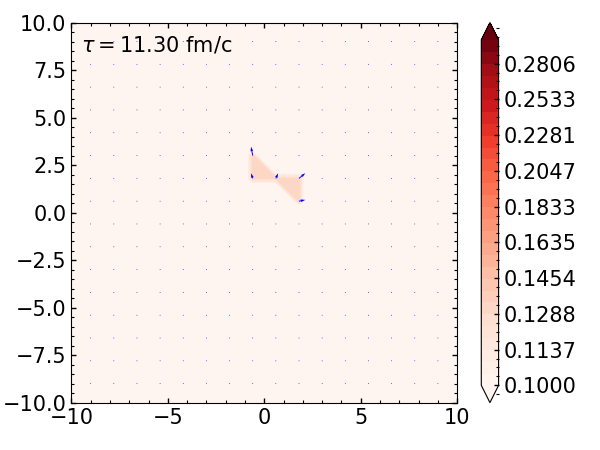

In [21]:
nskip = 2  # only plot every other point to speed up the live animation

X, Y = meshgrid(x, y)

v_mag = sqrt(vx[-1, 0, :, :]**2 + vy[-1, 0, :, :]**2.)

# first plot the first frame as the contour plot
levels2 = (linspace(0.10**0.25, 0.3**0.25, 30))**(4.)
fig = plt.figure()
cont = plt.contourf(X[::nskip, ::nskip], Y[::nskip, ::nskip],
                    T[0, 0, ::nskip, ::nskip],
                    levels2, cmap='Reds', extend='both')
Q = plt.quiver(X[::nskip, ::nskip], Y[::nskip, ::nskip],
              vy[0, 0, ::nskip, ::nskip],
              vx[0, 0, ::nskip, ::nskip],
              units='xy', scale_units='xy', scale=0.5, color='b')
time_text = plt.text(-9.5, 8.5, r"$\tau = {0:4.2f}$ fm/c".format(tau_list[0]))
cbar = fig.colorbar(cont)
plt.tight_layout()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# update the temperature contour and velocity vector field 
def update_quiver(num, Q, X, Y):
    global cont, time_text
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(X[::nskip, ::nskip], Y[::nskip, ::nskip],
                        T[num, 0, ::nskip, ::nskip],
                        levels2, cmap='Reds', extend='both')
    time_text.set_text(r"$\tau = {0:4.2f}$ fm/c".format(tau_list[num])) 
    
    U = vy[num, 0, ::nskip, ::nskip]
    V = vx[num, 0, ::nskip, ::nskip]
    
    Q = plt.quiver(X[::nskip, ::nskip], Y[::nskip, ::nskip],
                   U, V, units='xy', scale_units='xy', scale=0.5, color='b')
    return Q, cont, time_text  

# create the animation
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               frames=ntau, blit=False, repeat=False)

# save the animation
#anim.save('animation.mp4', fps=24)